In [44]:
#-*-coding:utf-8-*-

In [4]:
%pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 8.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=4362962 sha256=092aff36e4ca1487ad00928abeb8b9129896b58a07d2ae88259f85be12072667
  Stored in directory: /data/home/bmi-lab/.cache/pip/wheels/bc/19/6e/7461e0584c10c486b31b7d204a591d5e35812c13901ae93c24
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=4153aef99ea7f6f4804ebc073c5b635d26766f09b58ef938e327c14d9c482188
  Stored in directory: /data/home/bmi-lab/.cache/pip/wheels/3a/81/70/bb23245d63de9e0f53fc67dc6f30d871d443521aa026808210
Successfully built dlib face-recognition-models
N

### face_distance.py
- 임베딩 거리로 동일인물인지 판별
- [Github] [face_distance.py](https://github.com/ageitgey/face_recognition/blob/master/examples/face_distance.py)

In [3]:
import face_recognition

# Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.
# You can do that by using the face_distance function.

# The model was trained in a way that faces with a distance of 0.6 or less should be a match. But if you want to
# be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false
# positive matches at the risk of more false negatives.

# Note: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a
# smaller distance are more similar to each other than ones with a larger distance.

# Load some images to compare against
known_obama_image = face_recognition.load_image_file("(G)I-DLE 미연3.jpg")
known_biden_image = face_recognition.load_image_file("(G)I-DLE 우기4.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("(G)I-DLE 미연1.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.45 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.54 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? False



## KNN을 사용한 face recognition
- [Github] [face_recognition_knn.py](https://github.com/ageitgey/face_recognition/blob/master/examples/face_recognition_knn.py)

In [80]:
import os
import pandas as pd
import shutil
import glob

import face_recognition_knn
from face_recognition_knn import train
from face_recognition_knn import predict
from face_recognition_knn import show_prediction_labels_on_image

### Train Data 준비

In [346]:
all_img_list = glob.glob('./augmentation/*')
all_img_list

/data/home/chaewon215/ECNV/Dev Project/MTCNN


['./augmentation/Seventeen 디에잇4_vf.jpg',
 './augmentation/f(x) 루나1_vf.jpg',
 './augmentation/Brave Girls 유정2_pure.jpg',
 './augmentation/여자배우 김혜자4_pure.jpg',
 './augmentation/NCT 도영1_pure.jpg',
 './augmentation/NMIXX 배이4_pure.jpg',
 './augmentation/Apink 남주1_pure.jpg',
 './augmentation/Wanna One 라이관린2_pure.jpg',
 './augmentation/VIVIZ 신비3_pure.jpg',
 './augmentation/2:00 PM 준케이2_pure.jpg',
 './augmentation/WINNER 민호1_pure.jpg',
 './augmentation/Apink 보미4_vf.jpg',
 './augmentation/LE SSERAFIM 카즈하1_pure.jpg',
 './augmentation/배우 강민혁4_vf.jpg',
 './augmentation/aespa 윈터1_pure.jpg',
 './augmentation/Wanna One 다니엘2_vf.jpg',
 './augmentation/Twice 정연1_pure.jpg',
 './augmentation/IVE 원영2_pure.jpg',
 './augmentation/Oh My Girl 유빈3_pure.jpg',
 './augmentation/VIVIZ 엄지2_vf.jpg',
 './augmentation/Infinite 성열2_vf.jpg',
 './augmentation/BIGBANG 지드래곤3_pure.jpg',
 './augmentation/Twice 채영3_vf.jpg',
 './augmentation/배우 권율2_pure.jpg',
 './augmentation/Weki Meki 유정2_pure.jpg',
 './augmentation/NCT 태용3_pu

In [14]:
for file_name in all_img_list:
    if '1.jpg' in file_name:
            shutil.copy(file_name, "./showing_imgs/" + file_name.split('/')[-1])

In [ ]:
df = pd.DataFrame(columns=['img_path', 'label'])
df['img_path'] = all_img_list
df['label'] = df['img_path'].apply(lambda x : str(x).split('/')[-1].split('_')[0])
df

In [355]:
labels = list(df['label'].unique())

In [356]:
for i in range(len(labels)):
    if '*' in labels[i]:
        labels[i] = labels[i].replace('*', '')

    if '2:00 PM' in labels[i]:
        labels[i] = labels[i].replace('2:00 PM', '2PM')
        
    if 'Girl\'s' in labels[i]:
        labels[i] = labels[i].replace('Girl\'s', 'Girls')
labels

['배우 강동원',
 'NCT 도영',
 'WJSN 보나',
 'NCT 정우',
 '배우 김수현',
 '배우 공명',
 '여자배우 송혜교',
 'Twice 다현',
 'BTS 알엠',
 '여자배우 박신혜',
 'Brave Girls 유나',
 'Davichi 민경',
 'Mamamoo 문별',
 '(G)I-DLE 슈화',
 '여자배우 노윤서',
 'ASTRO 은우',
 '배우 남궁민',
 'EXO 백현',
 '여자배우 고아라',
 'Seventeen 민규',
 '배우 김무열',
 'VIVIZ 신비',
 'Teen Top 니엘',
 'ZE:A 시완',
 'Seventeen 호시',
 'BtoB 일훈',
 '배우 남주혁',
 'EXO 수호',
 'Super Junior 은혁',
 '여자배우 김세정',
 'IVE 원영',
 'NMIXX 해원',
 'Super Junior 성민',
 'Teen Top 캡',
 '여자배우 유이',
 'Apink 보미',
 '2NE1 씨엘',
 'SISTAR 소유',
 'IZONE 히토미',
 'Highlight 동운',
 'Seventeen 정한',
 '배우 마동석',
 '여자배우 이시영',
 'SNSD 티파니',
 'ITZY 류진',
 '배우 김민종',
 'SHINee 키',
 'CNBLUE 종현',
 'Infinite 엘',
 '여자배우 신혜선',
 'IVE 리즈',
 'NCT 재민',
 'EXO 카이',
 'IVE 유진',
 'SNSD 써니',
 'VIVIZ 은하',
 '2NE1 민지',
 'NCT 재현',
 'NMIXX 설윤',
 '배우 강민혁',
 'IZONE 나코',
 'ZE:A 동준',
 'Teen Top 리키',
 'T-ara 지연',
 '여자배우 배수지',
 'Wanna One 성우',
 'IZONE 유리',
 'SISTAR 다솜',
 'Oh My Girl 효정',
 'BtoB 프니엘',
 '배우 고수',
 '배우 강하늘',
 '여자배우 김지원',
 'Red Velvet 조이',
 'IZONE 은비',
 'Twice 정

In [343]:
len(labels)

349

In [358]:
# 디렉토리 생성
%cd /data/home/chaewon215/ECNV/Dev Project/MTCNN/test_dir
for label in labels:
    os.mkdir(label)

/data/home/chaewon215/ECNV/Dev Project/MTCNN/test_dir


In [377]:
# # 비어있지 않은 디렉토리 삭제
# %cd /data/home/chaewon215/ECNV/Dev Project/MTCNN/test_dir
# for label in labels:
#     shutil.rmtree(label)

In [378]:
%cd /data/home/chaewon215/ECNV/dayeong
test_img_list = glob.glob('./imgs_new/*')
test_img_list

/data/home/chaewon215/ECNV/dayeong


['./imgs_new/Davichi 해리5.jpg',
 './imgs_new/Seventeen 원우5.jpg',
 './imgs_new/BtoB 프니엘5.jpg',
 './imgs_new/Mamamoo 문별5.jpg',
 './imgs_new/WINNER 진우5.jpg',
 './imgs_new/Block B 지코5.jpg',
 './imgs_new/배우 고경표5.jpg',
 './imgs_new/Red Velvet 웬디5.jpg',
 './imgs_new/NewJeans 해린5.jpg',
 './imgs_new/여자배우 고윤정5.jpg',
 './imgs_new/Apink 보미5.jpg',
 './imgs_new/BTS 알엠5.jpg',
 './imgs_new/배우 고수5.jpg',
 './imgs_new/Teen Top 천지5.jpg',
 './imgs_new/Twice 모모5.jpg',
 './imgs_new/배우 김민석5.jpg',
 './imgs_new/NCT 재민5.jpg',
 "./imgs_new/Girl's Day 민아5.jpg",
 './imgs_new/Super Junior 려욱5.jpg',
 "./imgs_new/Girl's Day 혜리5.jpg",
 './imgs_new/Mamamoo 휘인5.jpg',
 './imgs_new/Twice 다현5.jpg',
 './imgs_new/VIVIZ 은하5.jpg',
 './imgs_new/BLACKPINK 지수5.jpg',
 './imgs_new/Brave Girls 유정5.jpg',
 './imgs_new/miss A 수지5.jpg',
 './imgs_new/배우 공명5.jpg',
 './imgs_new/배우 김정현5.jpg',
 './imgs_new/CNBLUE 민혁5.jpg',
 './imgs_new/aespa 지젤5.jpg',
 './imgs_new/배우 김영대5.jpg',
 './imgs_new/(G)I-DLE 슈화5.jpg',
 './imgs_new/Teen Top 리키5.jpg',
 '

In [379]:
len(test_img_list)

349

In [380]:
for i in range(len(test_img_list)):
    if '*' in labels[i]:
        all_img_list[i] = test_img_list[i].replace('*', '')

    if '2:00 PM' in labels[i]:
        all_img_list[i] = test_img_list[i].replace('2:00 PM', '2PM')
        
    if 'Girl\'s' in labels[i]:
        all_img_list[i] = test_img_list[i].replace('Girl\'s', 'Girls')
test_img_list

['./imgs_new/Davichi 해리5.jpg',
 './imgs_new/Seventeen 원우5.jpg',
 './imgs_new/BtoB 프니엘5.jpg',
 './imgs_new/Mamamoo 문별5.jpg',
 './imgs_new/WINNER 진우5.jpg',
 './imgs_new/Block B 지코5.jpg',
 './imgs_new/배우 고경표5.jpg',
 './imgs_new/Red Velvet 웬디5.jpg',
 './imgs_new/NewJeans 해린5.jpg',
 './imgs_new/여자배우 고윤정5.jpg',
 './imgs_new/Apink 보미5.jpg',
 './imgs_new/BTS 알엠5.jpg',
 './imgs_new/배우 고수5.jpg',
 './imgs_new/Teen Top 천지5.jpg',
 './imgs_new/Twice 모모5.jpg',
 './imgs_new/배우 김민석5.jpg',
 './imgs_new/NCT 재민5.jpg',
 "./imgs_new/Girl's Day 민아5.jpg",
 './imgs_new/Super Junior 려욱5.jpg',
 "./imgs_new/Girl's Day 혜리5.jpg",
 './imgs_new/Mamamoo 휘인5.jpg',
 './imgs_new/Twice 다현5.jpg',
 './imgs_new/VIVIZ 은하5.jpg',
 './imgs_new/BLACKPINK 지수5.jpg',
 './imgs_new/Brave Girls 유정5.jpg',
 './imgs_new/miss A 수지5.jpg',
 './imgs_new/배우 공명5.jpg',
 './imgs_new/배우 김정현5.jpg',
 './imgs_new/CNBLUE 민혁5.jpg',
 './imgs_new/aespa 지젤5.jpg',
 './imgs_new/배우 김영대5.jpg',
 './imgs_new/(G)I-DLE 슈화5.jpg',
 './imgs_new/Teen Top 리키5.jpg',
 '

In [367]:
for file_name in test_img_list:
    for label in labels:
        if label in file_name:
            shutil.copy(file_name, "../Dev Project/MTCNN/test_dir/" + label + '/' + file_name.split('/')[-1])

---

### Train

In [349]:
import os
import os.path

import pandas as pd
import shutil
import glob

import math
import sklearn
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

import pickle

from PIL import Image, ImageDraw, ImageFont

import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder

import face_recognition_knn
from face_recognition_knn import train
from face_recognition_knn import predict
from face_recognition_knn import show_prediction_labels_on_image

import warnings
warnings.filterwarnings(action='ignore')

In [375]:
knn = train('./MTCNN/train_dir', './MTCNN/test_dir', "./models/model_save_aug.clf", verbose=True)

### Test

In [247]:
pred = predict('프로필.jpg', knn_clf=None, model_path='./models/model_save_aug_30.clf', distance_threshold=0.1)
pred

[('LE SSERAFIM 카즈하', 0.5908664561760545, (620, 2606, 2607, 619)),
 ('여자배우 소이현', 0.2443424469977882, (620, 2606, 2607, 619)),
 ('2NE1 민지', 0.1647910968261572, (620, 2606, 2607, 619))]

In [ ]:
show_prediction_labels_on_image('프로필.jpg', pred)

---

In [102]:
test = glob.glob('/data/home/chaewon215/ECNV/dayeong/imgs_new/*')
test

['/data/home/chaewon215/ECNV/dayeong/imgs_new/Davichi 해리5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Seventeen 원우5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/BtoB 프니엘5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Mamamoo 문별5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/WINNER 진우5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Block B 지코5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 고경표5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Red Velvet 웬디5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/NewJeans 해린5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/여자배우 고윤정5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Apink 보미5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/BTS 알엠5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 고수5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Teen Top 천지5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Twice 모모5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 김민석5.j

In [381]:
notdetect = []
err = []
correct = 0

for path in test:
    pred = predict(path, knn_clf=None, model_path='./models/model_save_aug.clf', distance_threshold=0.6)
    if len(pred) > 0:
        if pred[0][0] in path:
#             print('result: O, ', path.split('/')[-1][:-4], ' detected!')
            correct += 1
        elif pred[1][0] in path or pred[2][0] in path:
#             print('result: O, ', path.split('/')[-1][:-4], ' detected! but not correct') 
            correct += 1
        else:
#             print('result: X, ', path.split('/')[-1][:-4], ' not detected!')
            notdetect.append(path.split('/')[-1][:-4])
    else:
#         print('err: predict length is zero', path.split('/')[-1][:-4])
        err.append(path.split('/')[-1])

print('accuracy: ', correct / len(test))

FileNotFoundError: [Errno 2] No such file or directory: './models/model_save_aug.clf'

---
## SVM을 활용한 face_recognition

In [12]:
%cd /data/home/chaewon215/ECNV/Dev Project/MTCNN

/data/home/chaewon215/ECNV/Dev Project/MTCNN


In [76]:
train_dir

['SISTAR 다솜',
 '배우 김재욱',
 'NCT 지성',
 '배우 박보검',
 '2NE1 다라',
 'Weki Meki 유정',
 'ZE:A 광희',
 '배우 류준열',
 'Red Velvet 웬디',
 'EXO 수호',
 'NMIXX 릴리',
 'Teen Top 창조',
 'Wonder Girls 혜림 ',
 'f(x) 루나',
 'Oh My Girl 아린',
 'BIGBANG 지드래곤',
 'miss A 수지',
 '배우 김영대',
 'Block B 피오',
 'BLACKPINK 리사',
 'NewJeans 혜인',
 'aespa 윈터',
 'FIFTY FIFTY 키나',
 'IZONE 채연',
 'T-ara 은정',
 'ITZY 예지',
 '2PM 닉쿤',
 'EXO 백현',
 'EXID 솔지',
 'ZE:A 동준',
 'IZONE 예나',
 'SHINee 키',
 'Wonder Girls 선미',
 'NCT 제노',
 'Super Junior 규현',
 'FIFTY FIFTY 아란',
 'Wanna One 지성',
 'ASTRO 은우',
 'Highlight 두준',
 'ITZY 채령',
 'Super Junior 희철',
 'Twice 다현',
 'FIFTY FIFTY 시오',
 'SNSD 티파니',
 '여자배우 이나영',
 'B1A4 공찬',
 '배우 다니엘 헤니',
 'WINNER 승훈',
 '배우 김영광',
 'Super Junior 시원',
 '배우 고수',
 '여자배우 고아성',
 'IZONE 혜원',
 'B1A4 신우',
 '배우 강태오',
 'EXID 정화',
 '여자배우 이성경',
 'SHINee 온유',
 'EXID 엘리',
 'IVE 리즈',
 'SHINee 태민',
 'aespa 카리나',
 '배우 남주혁',
 'NCT 재현',
 'SNSD 유리',
 'BtoB 은광',
 'SISTAR 효린',
 '여자배우 노윤서',
 'Red Velvet 슬기',
 '배우 김동욱',
 '배우 김민석',
 '여자배우 엄정화',
 '배우 김민

In [81]:
import face_recognition
from sklearn import svm
import os
import pickle

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []
count = 0

# Training directory
train_dir = os.listdir('./train_dir/')

# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("./train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("./train_dir/" + person + "/" + person_img)
        
        face_bounding_boxes = face_recognition.face_locations(face)
        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            count += 1
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
            if count % 10 == 0:
                print(count)
            
        elif len(face_bounding_boxes) != 1:
            print(person + "/" + person_img + " was skipped and can't be used for training")
print(count)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [82]:
len(names)

2648

In [151]:
# Create and train the SVC classifier
clf = svm.SVC(gamma='scale', probability=True)
clf.fit(encodings,names)

model_save_path = '../models/model_svm_prob.clf'
if model_save_path is not None:
    with open(model_save_path, 'wb') as f:
        pickle.dump(clf, f)

In [100]:
dir(clf)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_

In [ ]:
knn_clf = None
if knn_clf is None:
    with open(model_save_path, 'rb') as f:
        clf = pickle.load(f)

In [216]:
!pwd

/data/home/chaewon215/ECNV/Dev Project/MTCNN


In [229]:
# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('../은서.jpg')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(*name)

Number of faces detected:  1
Found:
After School 가은


In [213]:
clf.score([test_image_enc], proba)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [209]:
len(clf.probB_)

54615

In [220]:
# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('./train_dir/LE SSERAFIM 카즈하/LE SSERAFIM 카즈하1_pure.jpg')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    proba = clf.predict_proba([test_image_enc])

    # Find the index of the class with the maximum probability
    max_prob_index = np.argmax(proba)
    predicted_class_name = clf.classes_[max_prob_index]
    
    print(*name)
    print("Face", i+1, "belongs to:", predicted_class_name)

Number of faces detected:  1
Found:
LE SSERAFIM 카즈하
Face 1 belongs to: 여자배우 공효진


In [48]:
len(test_image_enc)

128

In [68]:
%cd /data/home/chaewon215/ECNV/Dev Project/MTCNN

/data/home/chaewon215/ECNV/Dev Project/MTCNN


In [159]:
clf.predict_proba([test_image_enc])

array([[0.00304375, 0.00348493, 0.00275316, 0.00355839, 0.0031317 ,
        0.0033147 , 0.00334613, 0.00364349, 0.00314057, 0.00393056,
        0.0031793 , 0.00224993, 0.00345771, 0.00346807, 0.0038482 ,
        0.00346326, 0.00159555, 0.00352013, 0.00299312, 0.00366473,
        0.00338551, 0.0033375 , 0.00274881, 0.00320156, 0.00209055,
        0.00326617, 0.00111109, 0.00381002, 0.00383993, 0.00366852,
        0.0031526 , 0.00313742, 0.00359948, 0.00344529, 0.00316411,
        0.00310531, 0.00177958, 0.00305285, 0.0033438 , 0.00358514,
        0.00308002, 0.00260099, 0.00367623, 0.00317324, 0.00364964,
        0.00364178, 0.00262374, 0.00274479, 0.00256017, 0.00322395,
        0.00304992, 0.00225054, 0.00278853, 0.00312145, 0.00222617,
        0.0028504 , 0.00250702, 0.00215492, 0.00362308, 0.00378805,
        0.00334911, 0.00375448, 0.00333139, 0.00327716, 0.00335329,
        0.00291114, 0.0032912 , 0.00141866, 0.00252427, 0.00322119,
        0.0028772 , 0.00327233, 0.00358532, 0.00

In [221]:
test_image = face_recognition.load_image_file('./train_dir/LE SSERAFIM 카즈하/LE SSERAFIM 카즈하1_pure.jpg')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict_proba([test_image_enc])
    print(*name)

Number of faces detected:  1
Found:
[0.00278332 0.00343128 0.00213638 0.0033799  0.00363826 0.00320165
 0.0034371  0.00292259 0.00189678 0.00222769 0.00305873 0.00273422
 0.00344844 0.00339545 0.00342157 0.0033573  0.00172741 0.00353712
 0.00280855 0.003624   0.00306966 0.00319938 0.00304823 0.00334141
 0.00203121 0.0031149  0.00114917 0.00328491 0.00365556 0.00240097
 0.00302834 0.00312079 0.00350433 0.00336744 0.00311677 0.00322303
 0.00187933 0.00328423 0.00325858 0.00324929 0.00317975 0.00306712
 0.00361434 0.00325515 0.00343483 0.00345633 0.00294208 0.0027462
 0.00287257 0.0030271  0.00312881 0.00304439 0.00308613 0.00336635
 0.00295556 0.00313669 0.00264912 0.00169334 0.00353138 0.00343138
 0.00319581 0.00360763 0.00333173 0.00331692 0.00319365 0.00312623
 0.00332335 0.00198815 0.00325062 0.00296033 0.00393304 0.00307421
 0.0034645  0.00334333 0.00332845 0.00330585 0.00257701 0.00345844
 0.00304639 0.00283946 0.00099381 0.00317828 0.00218414 0.00284623
 0.00351354 0.00280866 0.00

In [188]:
dir(clf.predict_proba.)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [197]:
clf.predict_proba.

<bound method BaseSVC.predict_proba of SVC(probability=True)>

In [185]:
len(clf.classes_)

331

In [130]:
clf.classes_

array(['(G)I-DLE 미연', '(G)I-DLE 민니', '(G)I-DLE 소연', '(G)I-DLE 슈화',
       '(G)I-DLE 우기', '2NE1 다라', '2NE1 민지', '2NE1 봄', '2NE1 씨엘',
       '4minute 현아', 'ASTRO 산하', 'ASTRO 은우', 'After School 가은',
       'After School 나나', 'After School 레이나', 'After School 리지',
       'After School 이영', 'Apink 남주', 'Apink 보미', 'Apink 은지', 'Apink 초롱',
       'Apink 하영', 'B1A4 공찬', 'B1A4 산들', 'B1A4 신우', 'BIGBANG 지드래곤',
       'BIGBANG 태양', 'BLACKPINK 로제', 'BLACKPINK 리사', 'BLACKPINK 제니',
       'BLACKPINK 지수', 'BTS 뷔', 'BTS 슈가', 'BTS 알엠', 'BTS 정국', 'BTS 제이홉',
       'BTS 지민', 'BTS 진', 'Billlie 문수아', 'Billlie 츠키', 'Block B 지코',
       'Block B 피오', 'Brave Girls 민영', 'Brave Girls 유나', 'Brave Girls 유정',
       'Brave Girls 은지', 'BtoB 민혁', 'BtoB 성재', 'BtoB 은광', 'BtoB 일훈',
       'BtoB 창섭', 'BtoB 프니엘', 'BtoB 현식', 'CNBLUE 민혁', 'CNBLUE 용화',
       'CNBLUE 정신', 'CNBLUE 종현', 'DAY6 원필', 'Davichi 민경', 'Davichi 해리',
       'EXID 솔지', 'EXID 엘리', 'EXID 정화', 'EXID 하니', 'EXID 혜린', 'EXO 디오',
       'EXO 백현', 'EXO 세훈', 'EXO

In [178]:
cls

['(G)I-DLE 미연',
 '(G)I-DLE 민니',
 '(G)I-DLE 소연',
 '(G)I-DLE 슈화',
 '(G)I-DLE 우기',
 '2NE1 다라',
 '2NE1 민지',
 '2NE1 봄',
 '2NE1 씨엘',
 '4minute 현아',
 'ASTRO 산하',
 'ASTRO 은우',
 'After School 가은',
 'After School 나나',
 'After School 레이나',
 'After School 리지',
 'After School 이영',
 'Apink 남주',
 'Apink 보미',
 'Apink 은지',
 'Apink 초롱',
 'Apink 하영',
 'B1A4 공찬',
 'B1A4 산들',
 'B1A4 신우',
 'BIGBANG 지드래곤',
 'BIGBANG 태양',
 'BLACKPINK 로제',
 'BLACKPINK 리사',
 'BLACKPINK 제니',
 'BLACKPINK 지수',
 'BTS 뷔',
 'BTS 슈가',
 'BTS 알엠',
 'BTS 정국',
 'BTS 제이홉',
 'BTS 지민',
 'BTS 진',
 'Billlie 문수아',
 'Billlie 츠키',
 'Block B 지코',
 'Block B 피오',
 'Brave Girls 민영',
 'Brave Girls 유나',
 'Brave Girls 유정',
 'Brave Girls 은지',
 'BtoB 민혁',
 'BtoB 성재',
 'BtoB 은광',
 'BtoB 일훈',
 'BtoB 창섭',
 'BtoB 프니엘',
 'BtoB 현식',
 'CNBLUE 민혁',
 'CNBLUE 용화',
 'CNBLUE 정신',
 'CNBLUE 종현',
 'DAY6 원필',
 'Davichi 민경',
 'Davichi 해리',
 'EXID 솔지',
 'EXID 엘리',
 'EXID 정화',
 'EXID 하니',
 'EXID 혜린',
 'EXO 디오',
 'EXO 백현',
 'EXO 세훈',
 'EXO 수호',
 'EXO 시우민',
 'EXO 카이',
 'FIFTY

In [228]:
# cls = sorted(list(clf.classes_), reverse=True)
# cls[292]
cls = list(clf.classes_)
cls[292]

'여자배우 공효진'

In [91]:
face_locations

[(428, 1315, 1094, 650)]

In [180]:
len(name[0])

331

In [136]:
import numpy as np

In [223]:
name[0][292]

0.004020502300271326

In [182]:
name[0].max()

0.004286031913938264

In [165]:
np.where(name[0] == name[0].max())

(array([229]),)

In [138]:
clf.classes_[6]

'2NE1 민지'

In [222]:
n = list(name[0])
n_sort = sorted(n, reverse=True)
print(n.index(n_sort[0]))
print(n.index(n_sort[1]))
print(n.index(n_sort[2]))

292
299
231


In [150]:
cls[165]

'Seventeen 도겸'

In [90]:
names

'SISTAR 다솜'

In [87]:
len(n)

331

In [21]:
test = glob.glob('/data/home/chaewon215/ECNV/dayeong/imgs_new/*')
test

['/data/home/chaewon215/ECNV/dayeong/imgs_new/Davichi 해리5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Seventeen 원우5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/BtoB 프니엘5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Mamamoo 문별5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/WINNER 진우5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Block B 지코5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 고경표5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Red Velvet 웬디5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/NewJeans 해린5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/여자배우 고윤정5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Apink 보미5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/BTS 알엠5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 고수5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Teen Top 천지5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/Twice 모모5.jpg',
 '/data/home/chaewon215/ECNV/dayeong/imgs_new/배우 김민석5.j

In [22]:
correct = 0
for path in test:
    test_image = face_recognition.load_image_file(path)

    # Find all the faces in the test image using the default HOG-based model
    face_locations = face_recognition.face_locations(test_image)
    no = len(face_locations)
#     print("Number of faces detected: ", no)

    # Predict all the faces in the test image using the trained classifier
#     print("Found:")
    for i in range(no):
        test_image_enc = face_recognition.face_encodings(test_image)[i]
        name = clf.predict([test_image_enc])
#         print(*name)
        
        if name[0] in path:
            correct += 1

print('accuracy: ', correct / len(test))

accuracy:  0.833810888252149


In [203]:
predicted_indices = np.argmax(name)
predicted_classes = clf.classes_[predicted_indices]
a predicted_classes

array(['Wonder Girls 유빈'], dtype='<U16')

In [33]:
!pwd

/data/home/chaewon215/ECNV/Dev Project/MTCNN


In [39]:
face_locations

[(428, 1315, 1094, 650)]

In [40]:
test_image = face_recognition.load_image_file('../profile_photo.png')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
#     print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
#     print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
#         print(*name)
pred = [(name[0], 0, face_locations[0])]

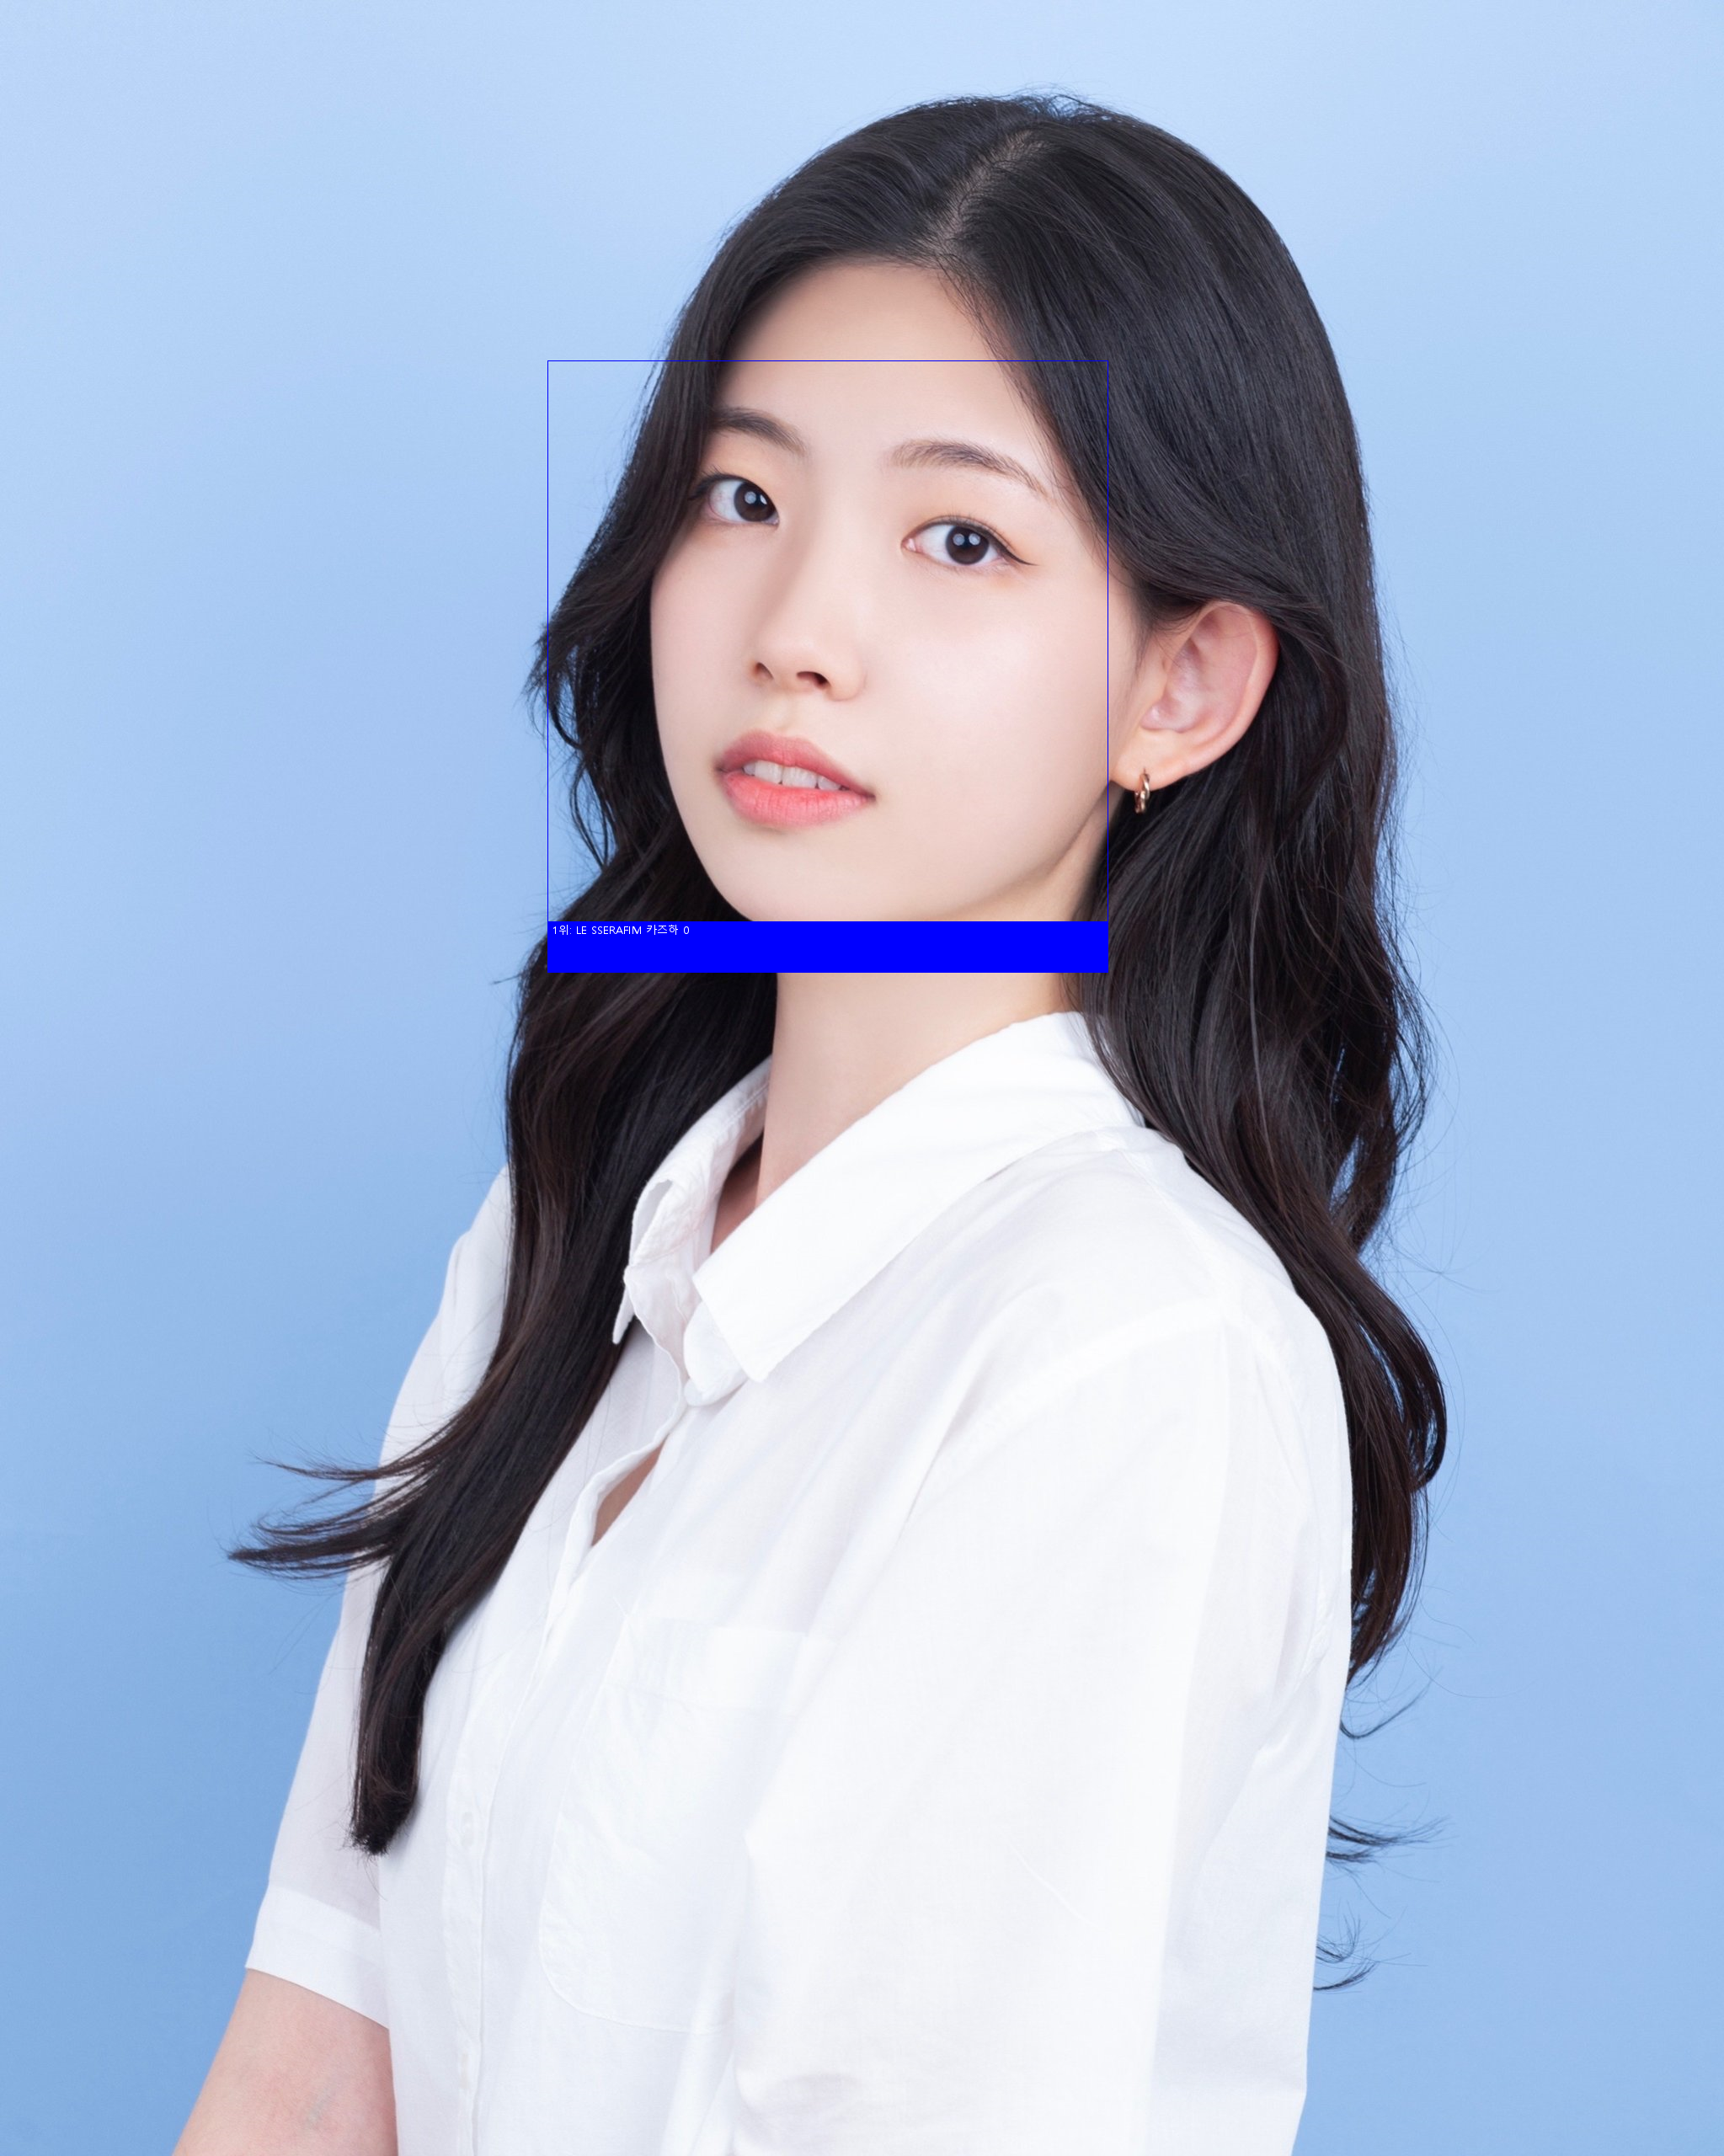

In [41]:
show_prediction_labels_on_image('../profile_photo.png', pred)

In [214]:
from sklearn import calibration
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
from sklearn.svm import SVC

In [215]:
import face_recognition
from sklearn import svm
import os
import pickle

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []
count = 0

# Training directory
train_dir = os.listdir('./train_dir/')

# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("./train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("./train_dir/" + person + "/" + person_img)
        
        face_bounding_boxes = face_recognition.face_locations(face)
        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            count += 1
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
            if count % 10 == 0:
                print(count)
            
        elif len(face_bounding_boxes) != 1:
            print(person + "/" + person_img + " was skipped and can't be used for training")
print(count)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [ ]:
# Create and train the SVC classifier
clf = CalibratedClassifierCV(SVC(), cv=5)
clf.fit(encodings,names)

model_save_path = '../models/model_calibrated.clf'
if model_save_path is not None:
    with open(model_save_path, 'wb') as f:
        pickle.dump(clf, f)

In [ ]:
# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('../profile_photo.png')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    proba = clf.predict_proba([test_image_enc])

    # Find the index of the class with the maximum probability
    max_prob_index = np.argmax(proba)
    predicted_class_name = clf.classes_[max_prob_index]
    
    print(*name)
    print("Face", i+1, "belongs to:", predicted_class_name)

In [ ]:
CalibratedClassifierCV(SVC(), cv=5)

## MLP를 활용한 face_recognition

In [43]:
import face_recognition
from sklearn.neural_network import MLPClassifier
import os

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.listdir('./train_dir/')

# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("./train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("./train_dir/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

# Create and train the MLP classifier
clf =  MLPClassifier(solver='adam', max_iter=100, 
                     hidden_layer_sizes=(10, 2), random_state=40, verbose=True)
clf.fit(encodings, names)

# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('../profile_photo.png')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(*name)

BIGBANG 지드래곤/BIGBANG 지드래곤1_vf.jpg was skipped and can't be used for training
배우 김영대/배우 김영대4_pure.jpg was skipped and can't be used for training
배우 김영대/배우 김영대4_vf.jpg was skipped and can't be used for training
BtoB 은광/BtoB 은광3_vf.jpg was skipped and can't be used for training
Seventeen 디노/Seventeen 디노1_vf.jpg was skipped and can't be used for training
Mamamoo 문별/Mamamoo 문별3_vf.jpg was skipped and can't be used for training
Lovelyz 미주/Lovelyz 미주4_vf.jpg was skipped and can't be used for training
LE SSERAFIM 사쿠라/LE SSERAFIM 사쿠라2_vf.jpg was skipped and can't be used for training
IZ*ONE 히토미/IZ*ONE 히토미1_vf.jpg was skipped and can't be used for training
Twice 모모/Twice 모모1_vf.jpg was skipped and can't be used for training
ZE:A 형식/ZE:A 형식1_vf.jpg was skipped and can't be used for training
ZE:A 형식/ZE:A 형식1_pure.jpg was skipped and can't be used for training
Teen Top 니엘/Teen Top 니엘3_vf.jpg was skipped and can't be used for training
Super Junior 성민/Super Junior 성민4_vf.jpg was skipped and can't be 

In [44]:
correct = 0
for path in test:
    test_image = face_recognition.load_image_file(path)

    # Find all the faces in the test image using the default HOG-based model
    face_locations = face_recognition.face_locations(test_image)
    no = len(face_locations)
#     print("Number of faces detected: ", no)

    # Predict all the faces in the test image using the trained classifier
#     print("Found:")
    for i in range(no):
        test_image_enc = face_recognition.face_encodings(test_image)[i]
        name = clf.predict([test_image_enc])
#         print(*name)
        
        if name[0] in path:
            correct += 1

print('accuracy: ', correct / len(test))

accuracy:  0.011461318051575931
